<a href="https://colab.research.google.com/github/Luis-Alves2/DataScience-IF697/blob/main/GDI%20-%20PROJETO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and csv read

In [223]:
!pip install --quiet mlflow

In [224]:
import pandas as pd

In [225]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [226]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [227]:
df.sum().isnull()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [228]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


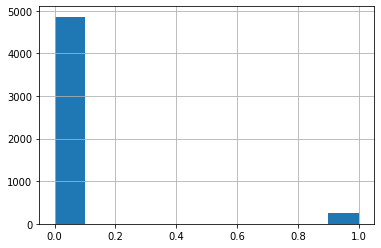

In [229]:
df.stroke.hist()

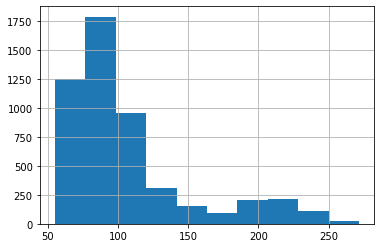

In [230]:
df.avg_glucose_level.hist()

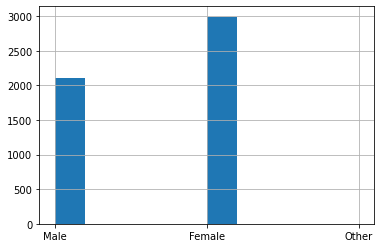

In [231]:
df.gender.hist()

In [232]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [233]:
df = df[df['gender'] != "Other"]

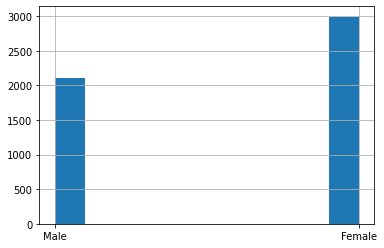

In [234]:
df.gender.hist()

In [235]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [236]:
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [237]:
df = df[~df['bmi'].isna()]

df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


#Splitting data


Balancing unbalanced dataset:

In [238]:
stroked_df = df[df['stroke'] == 1]

In [239]:
len(stroked_df.index)

209

In [240]:
nonstroked_df = df[df['stroke'] == 0]

In [241]:
samplednstrk_df = nonstroked_df.sample(n = 2 *len(stroked_df.index), random_state = 42)

In [242]:
newdf = pd.concat([stroked_df,samplednstrk_df])

In [243]:
import numpy as np

In [244]:
train, validate, test = np.split(newdf.sample(frac=1), [int(.6*len(newdf)), int(.8*len(newdf))])

#Creating Encoders

In [245]:
from sklearn import preprocessing
gender_encoder = preprocessing.LabelEncoder()

married_encoder = preprocessing.LabelEncoder()

work_encoder = preprocessing.LabelEncoder()

residence_encoder = preprocessing.LabelEncoder()

smoker_encoder = preprocessing.LabelEncoder()

#Fitting Transformers

In [246]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
38,47306,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
125,50522,Female,72.0,0,0,Yes,Govt_job,Urban,131.41,28.4,never smoked,1
4302,69647,Male,30.0,0,0,No,Private,Urban,63.42,28.0,never smoked,0
890,72310,Male,80.0,1,1,Yes,Self-employed,Urban,84.31,30.3,smokes,0
1295,54383,Male,60.0,0,0,Yes,Private,Rural,101.34,32.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
224,8899,Male,49.0,0,0,No,Private,Rural,104.86,31.9,smokes,1
3199,27382,Female,50.0,0,0,Yes,Govt_job,Urban,92.15,20.8,never smoked,0
5047,25102,Female,51.0,0,0,Yes,Govt_job,Urban,95.16,42.7,formerly smoked,0
4482,40447,Female,59.0,0,0,Yes,Private,Rural,82.42,28.8,never smoked,0


In [247]:
gender_encoder.fit(train['gender'])
train['gender'] = gender_encoder.transform(train['gender'])

In [248]:
gender_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [249]:
married_encoder.fit(train['ever_married'])
train['ever_married'] = married_encoder.transform(train['ever_married'])

In [250]:
work_encoder.fit(train['work_type'])
train['work_type'] = work_encoder.transform(train['work_type'])

In [251]:
residence_encoder.fit(train['Residence_type'])
train['Residence_type'] = residence_encoder.transform(train['Residence_type'])

In [252]:
smoker_encoder.fit(train['smoking_status'])
train['smoking_status'] = smoker_encoder.transform(train['smoking_status'])

In [253]:
def superEncoder(dataframer):
  dataframer['gender'] = gender_encoder.transform(dataframer['gender'])
  dataframer['ever_married'] = married_encoder.transform(dataframer['ever_married'])
  dataframer['work_type'] = work_encoder.transform(dataframer['work_type'])
  dataframer['Residence_type'] = residence_encoder.transform(dataframer['Residence_type'])
  dataframer['smoking_status'] = smoker_encoder.transform(dataframer['smoking_status'])
  return dataframer

In [254]:
#train = superEncoder(train)

In [255]:
test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3894,69435,Female,0.56,0,0,No,children,Urban,80.92,18.3,Unknown,0
134,20387,Female,68.00,1,0,Yes,Self-employed,Rural,206.09,26.7,never smoked,1
4414,13768,Female,38.00,0,0,Yes,Private,Urban,77.20,23.4,Unknown,0
3239,53141,Female,25.00,0,0,No,Private,Rural,67.73,22.6,never smoked,0
798,46683,Female,25.00,0,0,No,Private,Urban,122.01,27.0,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,1686,Female,29.00,0,0,No,Private,Urban,71.89,27.6,never smoked,0
3610,57219,Female,1.64,0,0,No,children,Rural,82.49,15.1,Unknown,0
165,42899,Male,78.00,0,0,Yes,Self-employed,Urban,133.19,23.6,formerly smoked,1
793,69427,Female,29.00,0,0,No,Private,Urban,101.28,22.7,never smoked,0


In [256]:
test = superEncoder(test)

In [257]:
validate = superEncoder(validate)

In [258]:
train_x = train.drop(['stroke'],axis = 1)

In [259]:
# Using .loc[] to select all columns except Duration column
train_y = train.loc[:, train.columns == "stroke"]

In [260]:
validate_x = validate.drop(['stroke'],axis = 1)

In [261]:
validate_y = validate.loc[:, validate.columns == "stroke"]

In [262]:
test_x = test.drop(['stroke'],axis = 1)

In [263]:
test_y = test.loc[:, test.columns == "stroke"]

#SVC implementation

In [264]:
from sklearn import svm

In [265]:
clf_SVC = svm.SVC()
clf_SVC.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC()

In [266]:
validater = validate.head(15)

In [267]:
#validater = superEncoder(validater)

In [268]:
validater

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
237,36857,1,77.0,0,0,1,3,0,162.14,32.6,1,1
2931,51497,1,28.0,0,0,1,3,1,156.45,24.3,2,0
1469,8723,0,16.0,0,0,0,2,0,70.15,21.5,0,0
4549,14943,0,17.0,0,0,0,2,0,79.62,21.6,2,0
687,7745,0,35.0,0,0,1,2,1,109.03,19.5,1,0
4214,23449,1,47.0,0,0,1,3,0,90.44,28.7,2,0
98,8154,1,57.0,1,0,1,0,1,78.92,27.7,1,1
71,2326,0,67.0,1,0,1,2,0,179.12,28.1,1,1
176,62466,0,80.0,0,0,1,2,1,64.44,45.0,2,1
4050,50072,0,26.0,0,0,0,2,0,58.55,29.0,2,0


In [269]:
validater_x = validater.drop('stroke', axis='columns')

In [270]:
print(list(clf_SVC.predict(validater_x)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [271]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#Decision Tree Classifier

In [272]:
from sklearn import tree

clf_Decision_Tree = tree.DecisionTreeClassifier()
clf_Decision_Tree = clf_Decision_Tree.fit(train_x, train_y)

In [273]:
print(list(clf_Decision_Tree.predict(validater_x)))

[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1]


In [274]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#Naive Gaussian

In [275]:
from sklearn.naive_bayes import GaussianNB
clf_Gaussian = GaussianNB()
clf_Gaussian.fit(train_x, list(train_y['stroke']))

GaussianNB()

In [276]:
print(list(clf_Gaussian.predict(validater_x)))

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]


In [277]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#Naive MultinomialNB

In [278]:
from sklearn.naive_bayes import MultinomialNB
clf_Multinomial = MultinomialNB()
clf_Multinomial.fit(train_x, list(train_y['stroke']))

MultinomialNB()

In [279]:
print(list(clf_Multinomial.predict(validater_x)))

[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]


In [280]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#Logistic Regression

In [281]:
from sklearn.linear_model import LogisticRegression
clf_Logistic = LogisticRegression(max_iter=1000)
clf_Logistic.fit(train_x, list(train_y['stroke']))

LogisticRegression(max_iter=1000)

In [282]:
print(list(clf_Logistic.predict(validater_x)))

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]


In [283]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#Random Forest

In [284]:
from sklearn.ensemble import RandomForestClassifier
clf_Random = RandomForestClassifier()
clf_Random.fit(train_x, list(train_y['stroke']))

RandomForestClassifier()

In [285]:
print(list(clf_Random.predict(validater_x)))

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]


In [286]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#KNN 

In [287]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(train_x, list(train_y['stroke']))

KNeighborsClassifier()

In [288]:
print(list(clf_KNN.predict(validater_x)))

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]


In [289]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#MLP

In [290]:
test_x = test.drop(['stroke'],axis = 1)

In [291]:
test_x['gender'] = test_x['gender'].astype('category')

test_x['ever_married'] = test_x['ever_married'].astype('category')

test_x['work_type'] = test_x['work_type'].astype('category')

test_x['Residence_type'] = test_x['Residence_type'].astype('category')

test_x['smoking_status'] = test_x['smoking_status'].astype('category')

In [292]:
# Using .loc[] to select all columns except Duration column
test_y = test.loc[:, test.columns == "stroke"]

In [ ]:
train_x['gender'] = train_x['gender'].astype('category')

train_x['ever_married'] = train_x['ever_married'].astype('category')

train_x['work_type'] = train_x['work_type'].astype('category')

train_x['Residence_type'] = train_x['Residence_type'].astype('category')

train_x['smoking_status'] = train_x['smoking_status'].astype('category')

In [294]:
#train_x

In [300]:
test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3894,69435,0,0.56,0,0,0,4,1,80.92,18.3,0,0
134,20387,0,68.00,1,0,1,3,0,206.09,26.7,2,1
4414,13768,0,38.00,0,0,1,2,1,77.20,23.4,0,0
3239,53141,0,25.00,0,0,0,2,0,67.73,22.6,2,0
798,46683,0,25.00,0,0,0,2,1,122.01,27.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,1686,0,29.00,0,0,0,2,1,71.89,27.6,2,0
3610,57219,0,1.64,0,0,0,4,0,82.49,15.1,0,0
165,42899,1,78.00,0,0,1,3,1,133.19,23.6,1,1
793,69427,0,29.00,0,0,0,2,1,101.28,22.7,2,0


In [ ]:
test_x = superEncoder(test_x)

In [301]:
test_x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3894,69435,0,0.56,0,0,0,4,1,80.92,18.3,0
134,20387,0,68.00,1,0,1,3,0,206.09,26.7,2
4414,13768,0,38.00,0,0,1,2,1,77.20,23.4,0
3239,53141,0,25.00,0,0,0,2,0,67.73,22.6,2
798,46683,0,25.00,0,0,0,2,1,122.01,27.0,3
...,...,...,...,...,...,...,...,...,...,...,...
319,1686,0,29.00,0,0,0,2,1,71.89,27.6,2
3610,57219,0,1.64,0,0,0,4,0,82.49,15.1,0
165,42899,1,78.00,0,0,1,3,1,133.19,23.6,1
793,69427,0,29.00,0,0,0,2,1,101.28,22.7,2


In [302]:
validate_x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
237,36857,1,77.00,0,0,1,3,0,162.14,32.6,1
2931,51497,1,28.00,0,0,1,3,1,156.45,24.3,2
1469,8723,0,16.00,0,0,0,2,0,70.15,21.5,0
4549,14943,0,17.00,0,0,0,2,0,79.62,21.6,2
687,7745,0,35.00,0,0,1,2,1,109.03,19.5,1
...,...,...,...,...,...,...,...,...,...,...,...
9,60491,0,78.00,0,0,1,2,1,58.57,24.2,0
3440,18837,1,0.56,0,0,0,4,1,98.23,14.1,0
221,68023,1,79.00,0,0,1,2,0,72.73,28.4,2
3132,71192,1,11.00,0,0,0,4,0,56.33,18.1,0


In [303]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(random_state=1, max_iter=300).fit(train_x, train_y)
print(clf_MLP.predict_proba(validate_x[:1]))

#clf_MLP.predict(test_x[:5, :])

clf_MLP.score(validate_x, validate_y)

[[1.00000000e+00 6.58885791e-38]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.648

In [304]:
print(list(clf_MLP.predict(validater_x)))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [305]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


#All Results

In [306]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [307]:
pred = clf_KNN.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)


  acc: 0.568
  f1: 0.5375503685503685
  recal: 0.568


In [308]:
#print(list(clf_MLP.predict(validater_x)))

pred = clf_MLP.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)


  acc: 0.648
  f1: 0.5675169366715758
  recal: 0.648


In [309]:
print(list(clf_Random.predict(validater_x)))

pred = clf_Random.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]
  acc: 0.72
  f1: 0.7144099821746881
  recal: 0.72


In [310]:
print(list(clf_Logistic.predict(validater_x)))

pred = clf_Logistic.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]
  acc: 0.72
  f1: 0.722641331446668
  recal: 0.72


In [311]:
print(list(clf_Multinomial.predict(validater_x)))

pred = clf_Multinomial.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]
  acc: 0.48
  f1: 0.4877037037037037
  recal: 0.48


In [312]:
print(list(clf_Gaussian.predict(validater_x)))


pred = clf_Gaussian.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]
  acc: 0.712
  f1: 0.7151321160042965
  recal: 0.712


In [313]:
print(list(clf_Decision_Tree.predict(validater_x)))

pred = clf_Decision_Tree.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)

[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
  acc: 0.776
  f1: 0.7777575757575758
  recal: 0.776


In [314]:
print(list(clf_SVC.predict(validater_x)))

pred = clf_SVC.predict(validate_x)
acc = accuracy_score(validate_y, pred)
f1 = f1_score(validate_y, pred, average='weighted')
rec = recall_score(validate_y, pred, average='weighted')

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  acc: 0.632
  f1: 0.4894901960784313
  recal: 0.632


In [315]:
print(list(validater['stroke']))

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]


Modelos definidos como melhores para otimizar:

Random Forest

Decision Tree

Gaussian naive bayes

Logistic Regression


#MLFLOW

In [316]:
import mlflow
import mlflow.sklearn

import os
import warnings
import sys

from sklearn import metrics
from urllib.parse import urlparse

from datetime import datetime


In [317]:
with mlflow.start_run():

  clf_SVC = svm.SVC()
  clf_SVC.fit(train_x, train_y)

  pred = clf_SVC.predict(validate_x)

  acc = accuracy_score(validate_y, pred)
  f1 = f1_score(validate_y, pred, average='weighted')
  rec = recall_score(validate_y, pred, average='weighted')

  print("  acc: %s" % acc)
  print("  f1: %s" % f1)
  print("  recal: %s" % rec)

  mlflow.log_metric("acc", acc)
  mlflow.log_metric("f1", f1)
  mlflow.log_metric("recal", rec)

  mlflow.sklearn.log_model(clf_SVC, 'modelo')
  caminho_modelo = 'modelo'
  mlflow.sklearn.save_model(clf_SVC, path='./modelo/mlflow/model-SVC-%i'%(int(datetime.now().timestamp())))

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

  # Model registry does not work with file store
  if tracking_url_type_store != "file":

      # Register the model
      # There are other ways to use the Model Registry, which depends on the use case,
      # please refer to the doc for more information:
      # https://mlflow.org/docs/latest/model-registry.html#api-workflow
      mlflow.sklearn.log_model(clf_SVC, "model", registered_model_name="SVC" + (int(datetime.now().timestamp())))
  else:
      mlflow.sklearn.log_model(clf_SVC, "model")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



  acc: 0.632
  f1: 0.4894901960784313
  recal: 0.632


In [318]:
with mlflow.start_run():

  clf_Decision_Tree = tree.DecisionTreeClassifier()
  clf_Decision_Tree = clf_Decision_Tree.fit(train_x, train_y)

  pred = clf_Decision_Tree.predict(validate_x)

  acc = accuracy_score(validate_y, pred)
  f1 = f1_score(validate_y, pred, average='weighted')
  rec = recall_score(validate_y, pred, average='weighted')

  print("  acc: %s" % acc)
  print("  f1: %s" % f1)
  print("  recal: %s" % rec)

  mlflow.log_metric("acc", acc)
  mlflow.log_metric("f1", f1)
  mlflow.log_metric("recal", rec)

  mlflow.sklearn.log_model(clf_Decision_Tree, 'modelo')
  caminho_modelo = 'modelo'
  mlflow.sklearn.save_model(clf_Decision_Tree, path='./modelo/mlflow/model-DECISION-%i'%(int(datetime.now().timestamp())))

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

  # Model registry does not work with file store
  if tracking_url_type_store != "file":

      # Register the model
      # There are other ways to use the Model Registry, which depends on the use case,
      # please refer to the doc for more information:
      # https://mlflow.org/docs/latest/model-registry.html#api-workflow
      mlflow.sklearn.log_model(clf_Decision_Tree, "model", registered_model_name="DecisionTree" + (int(datetime.now().timestamp())))
  else:
      mlflow.sklearn.log_model(clf_Decision_Tree, "model")

  acc: 0.752
  f1: 0.755559572064589
  recal: 0.752


In [319]:
with mlflow.start_run():


  clf_Gaussian = GaussianNB()
  clf_Gaussian = clf_Gaussian.fit(train_x, train_y)
  
  pred = clf_Gaussian.predict(validate_x)

  acc = accuracy_score(validate_y, pred)
  f1 = f1_score(validate_y, pred, average='weighted')
  rec = recall_score(validate_y, pred, average='weighted')

  print("  acc: %s" % acc)
  print("  f1: %s" % f1)
  print("  recal: %s" % rec)

  mlflow.log_metric("acc", acc)
  mlflow.log_metric("f1", f1)
  mlflow.log_metric("recal", rec)

  mlflow.sklearn.log_model(clf_Gaussian, 'modelo')
  caminho_modelo = 'modelo'
  mlflow.sklearn.save_model(clf_Gaussian, path='./modelo/mlflow/model-GAUSSIAN-%i'%(int(datetime.now().timestamp())))

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

  # Model registry does not work with file store
  if tracking_url_type_store != "file":

      # Register the model
      # There are other ways to use the Model Registry, which depends on the use case,
      # please refer to the doc for more information:
      # https://mlflow.org/docs/latest/model-registry.html#api-workflow
      mlflow.sklearn.log_model(clf_Gaussian, "model", registered_model_name="Gaussian" + (int(datetime.now().timestamp())))
  else:
      mlflow.sklearn.log_model(clf_Gaussian, "model")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



  acc: 0.712
  f1: 0.7151321160042965
  recal: 0.712


In [320]:
with mlflow.start_run():

  clf_Random = RandomForestClassifier()
  clf_Random.fit(train_x, list(train_y['stroke']))

  pred = clf_Random.predict(validate_x)

  acc = accuracy_score(validate_y, pred)
  f1 = f1_score(validate_y, pred, average='weighted')
  rec = recall_score(validate_y, pred, average='weighted')

  print("  acc: %s" % acc)
  print("  f1: %s" % f1)
  print("  recal: %s" % rec)

  mlflow.log_metric("acc", acc)
  mlflow.log_metric("f1", f1)
  mlflow.log_metric("recal", rec)

  mlflow.sklearn.log_model(clf_Random, 'modelo')
  caminho_modelo = 'modelo'
  mlflow.sklearn.save_model(clf_Random, path='./modelo/mlflow/model-RANDOM-%i'%(int(datetime.now().timestamp())))

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

  # Model registry does not work with file store
  if tracking_url_type_store != "file":

      # Register the model
      # There are other ways to use the Model Registry, which depends on the use case,
      # please refer to the doc for more information:
      # https://mlflow.org/docs/latest/model-registry.html#api-workflow
      mlflow.sklearn.log_model(clf_Random, "model", registered_model_name="RandomForest" + (int(datetime.now().timestamp())))
  else:
      mlflow.sklearn.log_model(clf_Random, "model")

  acc: 0.776
  f1: 0.7749111111111111
  recal: 0.776


In [321]:
with mlflow.start_run():

  clf_MLP = MLPClassifier(random_state=1, max_iter=300).fit(train_x, train_y)

  pred = clf_MLP.predict(validate_x)

  acc = accuracy_score(validate_y, pred)
  f1 = f1_score(validate_y, pred, average='weighted')
  rec = recall_score(validate_y, pred, average='weighted')

  print("  acc: %s" % acc)
  print("  f1: %s" % f1)
  print("  recal: %s" % rec)

  mlflow.log_metric("acc", acc)
  mlflow.log_metric("f1", f1)
  mlflow.log_metric("recal", rec)

  mlflow.sklearn.log_model(clf_MLP, 'modelo')
  caminho_modelo = 'modelo'
  mlflow.sklearn.save_model(clf_MLP, path='./modelo/mlflow/model-MLP-%i'%(int(datetime.now().timestamp())))

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

  # Model registry does not work with file store
  if tracking_url_type_store != "file":

      # Register the model
      # There are other ways to use the Model Registry, which depends on the use case,
      # please refer to the doc for more information:
      # https://mlflow.org/docs/latest/model-registry.html#api-workflow
      mlflow.sklearn.log_model(clf_MLP, "model", registered_model_name="MLP" + (int(datetime.now().timestamp())))
  else:
      mlflow.sklearn.log_model(clf_MLP, "model")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



  acc: 0.648
  f1: 0.5675169366715758
  recal: 0.648


In [322]:
print(list(test_y['stroke']))

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]


In [323]:
print(list(pred))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#Optmization with Optuna

Random Forest Idea

In [328]:
!pip install --quiet optuna

In [329]:
import optuna

from sklearn.model_selection import cross_val_score

optuna.__version__

'3.0.2'

In [330]:
import optuna
import sklearn

def objective_Random(trial):
      #iris = sklearn.datasets.load_iris()
      n_estimators = trial.suggest_int('n_estimators', 2, 20)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
      clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

      score = cross_val_score(clf, train_x, train_y, n_jobs=-1, cv=5)
      return sklearn.model_selection.cross_val_score(clf, train_x, train_y, 
           n_jobs=-1).mean()

In [331]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_Random, n_trials=100)

[I 2022-10-03 21:53:57,367] A new study created in memory with name: no-name-a790d25a-a1b9-48a4-8f66-d376e5d1dbba
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-10-03 21:53:59,611] Trial 0 finished with value: 0.7607017543859648 and parameters: {'n_estimators': 15, 'max_depth': 4.811431351520997}. Best is trial 0 with value: 0.7607017543859648.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-10-03 21:53:59,951] Trial 1 finished with value: 0.7234385964912281 and parameters: {'n_estimators': 15, 'max_depth'

In [332]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.768701754385965


In [333]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'n_estimators': 8, 'max_depth': 3.700126918343364}


In [334]:
optuna.visualization.plot_optimization_history(study)

In [335]:
optunaRandomForest = trial

In [336]:
import optuna
import sklearn

def objective_Decision(trial):
      #criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
      clf = tree.DecisionTreeClassifier(max_depth=max_depth)

      score = cross_val_score(clf, train_x, train_y, n_jobs=-1, cv=5)
      return sklearn.model_selection.cross_val_score(clf, train_x, train_y, 
           n_jobs=-1).mean()

In [337]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_Decision, n_trials=100)

[I 2022-10-03 21:54:49,192] A new study created in memory with name: no-name-f31720d6-184d-4e26-a465-07f17b7a6ea9
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-10-03 21:54:49,344] Trial 0 finished with value: 0.7128421052631578 and parameters: {'max_depth': 26.046076531462226}. Best is trial 0 with value: 0.7128421052631578.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-10-03 21:54:49,479] Trial 1 finished with value: 0.6943157894736842 and parameters: {'max_depth': 10.712354613222317}. Best is trial 0 

In [338]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.7234736842105263


In [339]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'max_depth': 2.175727340749944}


In [340]:
optuna.visualization.plot_optimization_history(study)

In [341]:
optunaDecisionTree = trial

In [342]:
def objective_Gaussian(trial):
      #criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
      var_smoothing = trial.suggest_float('var_smoothing', 1e-9, 1e-7)
      clf = GaussianNB(var_smoothing=var_smoothing)

      score = cross_val_score(clf, train_x, train_y, n_jobs=-1, cv=5)
      return sklearn.model_selection.cross_val_score(clf, train_x, train_y, 
           n_jobs=-1).mean()

In [343]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_Gaussian, n_trials=100)

[I 2022-10-03 21:55:10,425] A new study created in memory with name: no-name-450be61b-d55a-4ca9-ba13-a84d4219098a
[I 2022-10-03 21:55:10,760] Trial 0 finished with value: 0.7474035087719298 and parameters: {'var_smoothing': 5.9504453355218106e-08}. Best is trial 0 with value: 0.7474035087719298.
[I 2022-10-03 21:55:11,067] Trial 1 finished with value: 0.7607368421052632 and parameters: {'var_smoothing': 2.8277266966353242e-08}. Best is trial 1 with value: 0.7607368421052632.
[I 2022-10-03 21:55:11,415] Trial 2 finished with value: 0.7607368421052632 and parameters: {'var_smoothing': 2.51208476664596e-08}. Best is trial 1 with value: 0.7607368421052632.
[I 2022-10-03 21:55:11,627] Trial 3 finished with value: 0.7607368421052632 and parameters: {'var_smoothing': 2.608671584684478e-08}. Best is trial 1 with value: 0.7607368421052632.
[I 2022-10-03 21:55:11,923] Trial 4 finished with value: 0.7607368421052632 and parameters: {'var_smoothing': 2.504390356086817e-08}. Best is trial 1 with va

In [344]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.7660350877192983


In [345]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'var_smoothing': 1.9752073778715224e-08}


In [346]:
optuna.visualization.plot_optimization_history(study)

In [347]:
optunaGaussianNaive = trial

In [348]:
def objective_Logistic(trial):
      #criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
      tol = trial.suggest_float('tol', 1e-4, 1e-3)
      solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear"])
      logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)

      clf = LogisticRegression(tol = tol, solver = solver,C=logreg_c)

      score = cross_val_score(clf, train_x, train_y, n_jobs=-1, cv=5)
      return sklearn.model_selection.cross_val_score(clf, train_x, train_y, 
           n_jobs=-1).mean()

In [349]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_Logistic, n_trials=100)

[I 2022-10-03 21:55:30,352] A new study created in memory with name: no-name-24174f7c-f177-4fd3-a53a-ff4209b87593
[I 2022-10-03 21:55:30,488] Trial 0 finished with value: 0.7260350877192983 and parameters: {'tol': 0.00014973464550248724, 'solver': 'liblinear', 'logreg_c': 359958758.8906653}. Best is trial 0 with value: 0.7260350877192983.
[I 2022-10-03 21:55:30,851] Trial 1 finished with value: 0.7366315789473685 and parameters: {'tol': 0.000911871007030633, 'solver': 'lbfgs', 'logreg_c': 83107689.29923691}. Best is trial 1 with value: 0.7366315789473685.
[I 2022-10-03 21:55:32,657] Trial 2 finished with value: 0.7500350877192983 and parameters: {'tol': 0.0005489134625690689, 'solver': 'newton-cg', 'logreg_c': 2237878668.1755724}. Best is trial 2 with value: 0.7500350877192983.
[I 2022-10-03 21:55:32,926] Trial 3 finished with value: 0.6968421052631578 and parameters: {'tol': 0.0009719244005907469, 'solver': 'lbfgs', 'logreg_c': 0.00017714196271935794}. Best is trial 2 with value: 0.75

In [350]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.7659649122807017


In [351]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'tol': 0.0003881515739688641, 'solver': 'newton-cg', 'logreg_c': 0.3771335941541569}


In [352]:
optuna.visualization.plot_optimization_history(study)

In [353]:
optunaLogisticRegression = trial

#Testing 4 best algorithms

In [354]:
validate_x = validate.drop(['stroke'],axis = 1)

In [355]:
validate_y = validate.loc[:, validate.columns == "stroke"]

In [356]:
def detailed_objective_Random(trial):

    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))

    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    clf.fit(train_x, train_y)

    # calculate more evaluation metrics
    pred = clf.predict(validate_x)

    acc = metrics.accuracy_score(pred, validate_y)
    recall = metrics.recall_score(pred, validate_y)
    precision = metrics.precision_score(pred, validate_y)
    f1 = metrics.f1_score(pred, validate_y)

    return acc, f1, recall, precision

In [357]:
def detailed_objective_Decision(trial):

    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))

    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(train_x, train_y)

    # calculate more evaluation metrics
    pred = clf.predict(validate_x)

    acc = metrics.accuracy_score(pred, validate_y)
    recall = metrics.recall_score(pred, validate_y)
    precision = metrics.precision_score(pred, validate_y)
    f1 = metrics.f1_score(pred, validate_y)

    return acc, f1, recall, precision

In [358]:
def detailed_objective_Gaussian(trial):

    var_smoothing = trial.suggest_float('var_smoothing', 1e-9, 1e-7)

    clf = GaussianNB(var_smoothing=var_smoothing)
    clf.fit(train_x, train_y)

    # calculate more evaluation metrics
    pred = clf.predict(validate_x)

    acc = metrics.accuracy_score(pred, validate_y)
    recall = metrics.recall_score(pred, validate_y)
    precision = metrics.precision_score(pred, validate_y)
    f1 = metrics.f1_score(pred, validate_y)

    return acc, f1, recall, precision

In [359]:
def detailed_objective_Logistic(trial):

    tol = trial.suggest_float('tol', 1e-4, 1e-3)
    solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear"])
    logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)

    clf = LogisticRegression(tol = tol, solver = solver,C=logreg_c, max_iter = 10000)
    clf.fit(train_x, train_y)

    # calculate more evaluation metrics
    pred = clf.predict(validate_x)

    acc = metrics.accuracy_score(pred, validate_y)
    recall = metrics.recall_score(pred, validate_y)
    precision = metrics.precision_score(pred, validate_y)
    f1 = metrics.f1_score(pred, validate_y)

    return acc, f1, recall, precision

In [360]:
acc, f1, rec, precision = detailed_objective_Logistic(optunaLogisticRegression) 

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)
print("  precision: %s" % precision)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWa

  acc: 0.72
  f1: 0.6236559139784946
  recal: 0.6170212765957447
  precision: 0.6304347826086957


In [361]:
acc, f1, rec, precision = detailed_objective_Gaussian(optunaGaussianNaive) 

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)
print("  precision: %s" % precision)

  acc: 0.704
  f1: 0.6262626262626263
  recal: 0.5849056603773585
  precision: 0.6739130434782609


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [362]:
acc, f1, rec, precision = detailed_objective_Decision(optunaDecisionTree) 

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)
print("  precision: %s" % precision)

  acc: 0.68
  f1: 0.5
  recal: 0.5882352941176471
  precision: 0.43478260869565216


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.



In [363]:
acc, f1, rec, precision = detailed_objective_Random(optunaRandomForest) 

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)
print("  precision: %s" % precision)

  acc: 0.728
  f1: 0.5750000000000001
  recal: 0.6764705882352942
  precision: 0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Best Model: Gaussian Naive Bayes

#Diagnostic Best Model of All

In [367]:
test_y


,stroke
3894,0
134,1
4414,0
3239,0
798,0
...,...
319,0
3610,0
165,1
793,0


In [368]:
test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3894,69435,0,0.56,0,0,0,4,1,80.92,18.3,0,0
134,20387,0,68.00,1,0,1,3,0,206.09,26.7,2,1
4414,13768,0,38.00,0,0,1,2,1,77.20,23.4,0,0
3239,53141,0,25.00,0,0,0,2,0,67.73,22.6,2,0
798,46683,0,25.00,0,0,0,2,1,122.01,27.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,1686,0,29.00,0,0,0,2,1,71.89,27.6,2,0
3610,57219,0,1.64,0,0,0,4,0,82.49,15.1,0,0
165,42899,1,78.00,0,0,1,3,1,133.19,23.6,1,1
793,69427,0,29.00,0,0,0,2,1,101.28,22.7,2,0


In [ ]:
#test['ever_married'] = married_encoder.transform(test['ever_married'])

In [ ]:
#test['work_type'] = work_encoder.transform(test['work_type'])

In [ ]:
#test['Residence_type'] = residence_encoder.transform(test['Residence_type'])

In [ ]:
#test['smoking_status'] = smoker_encoder.transform(test['smoking_status'])

In [370]:
test_x = test.drop(['stroke'],axis = 1)

In [371]:
test_y = test.loc[:, test.columns == "stroke"]

In [372]:
def detailed_diagnose1_Gaussian(trial):

    var_smoothing = trial.suggest_float('var_smoothing', 1e-9, 1e-7)

    clf = GaussianNB(var_smoothing=var_smoothing)
    clf.fit(train_x, train_y)

    # calculate more evaluation metrics
    pred = clf.predict(test_x)

    acc = metrics.accuracy_score(pred, test_y)
    recall = metrics.recall_score(pred, test_y)
    precision = metrics.precision_score(pred, test_y)
    f1 = metrics.f1_score(pred, test_y)

    return acc, f1, recall, precision

In [373]:
def detailed_diagnose2_Gaussian(trial):

    var_smoothing = trial.suggest_float('var_smoothing', 1e-9, 1e-7)

    clf = GaussianNB(var_smoothing=var_smoothing)
    clf.fit(train_x, train_y)

    # calculate more evaluation metrics
    pred = clf.predict(validate_x)

    acc = metrics.accuracy_score(pred, validate_y)
    recall = metrics.recall_score(pred, validate_y)
    precision = metrics.precision_score(pred, validate_y)
    f1 = metrics.f1_score(pred, validate_y)

    return acc, f1, recall, precision

In [374]:
def detailed_diagnose3_Gaussian(trial):

    var_smoothing = trial.suggest_float('var_smoothing', 1e-9, 1e-7)

    clf = GaussianNB(var_smoothing=var_smoothing)
    clf.fit(train_x, train_y)

    # calculate more evaluation metrics
    pred = clf.predict(train_x)

    acc = metrics.accuracy_score(pred, train_y)
    recall = metrics.recall_score(pred, train_y)
    precision = metrics.precision_score(pred, train_y)
    f1 = metrics.f1_score(pred, train_y)

    return acc, f1, recall, precision

In [375]:
acc, f1, rec, precision = detailed_diagnose1_Gaussian(optunaGaussianNaive) 

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)
print("  precision: %s" % precision)

  acc: 0.7698412698412699
  f1: 0.6741573033707865
  recal: 0.6122448979591837
  precision: 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [376]:
acc, f1, rec, precision = detailed_diagnose2_Gaussian(optunaGaussianNaive) 

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)
print("  precision: %s" % precision)

  acc: 0.704
  f1: 0.6262626262626263
  recal: 0.5849056603773585
  precision: 0.6739130434782609


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [377]:
acc, f1, rec, precision = detailed_diagnose3_Gaussian(optunaGaussianNaive) 

print("  acc: %s" % acc)
print("  f1: %s" % f1)
print("  recal: %s" % rec)
print("  precision: %s" % precision)

  acc: 0.7686170212765957
  f1: 0.6561264822134387
  recal: 0.6384615384615384
  precision: 0.6747967479674797


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Podemos notar que independente do conjunto utilizado as métricas ficaram similares, concluímos então que não é existiu overfitting ou underfitting. Considerando o modelo utilizado isso faz total sentido.